In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'E:\MLData\naiveByesData')

In [3]:
os.listdir()

['Mobile_Price.zip', 'test.csv', 'train.csv']

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### EDA

#### Univariate analysis

##### Numerical variable

In [9]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

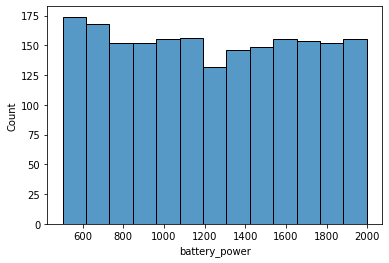

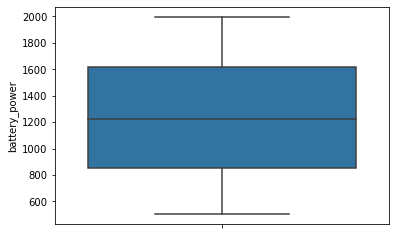

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'kurtosis': -1.22}

In [11]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='battery_power')

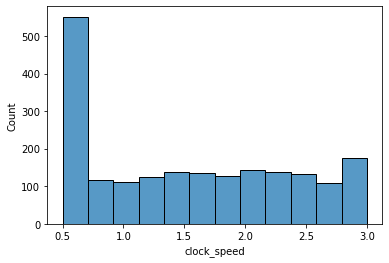

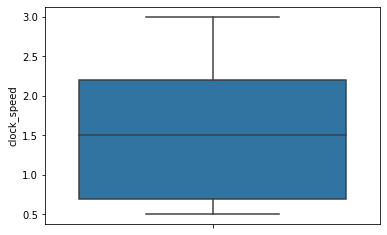

{'missing': 0,
 'min': 0.5,
 'max': 3.0,
 'mean': 1.52,
 'var': 0.67,
 'std': 0.82,
 'range': 2.5,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.2,
 'skewness': 0.18,
 'kurtosis': -1.32}

In [12]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='clock_speed')

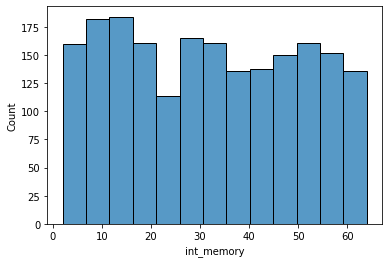

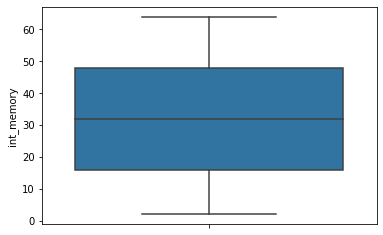

{'missing': 0,
 'min': 2,
 'max': 64,
 'mean': 32.05,
 'var': 329.27,
 'std': 18.15,
 'range': 62,
 'q1': 16.0,
 'q2': 32.0,
 'q3': 48.0,
 'skewness': 0.06,
 'kurtosis': -1.22}

In [13]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='int_memory')

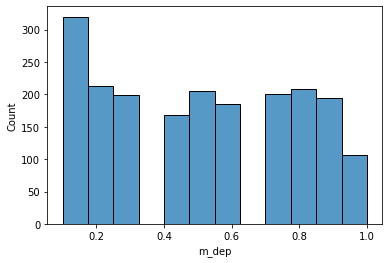

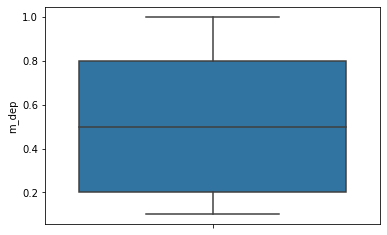

{'missing': 0,
 'min': 0.1,
 'max': 1.0,
 'mean': 0.5,
 'var': 0.08,
 'std': 0.29,
 'range': 0.9,
 'q1': 0.2,
 'q2': 0.5,
 'q3': 0.8,
 'skewness': 0.09,
 'kurtosis': -1.27}

In [14]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='m_dep')

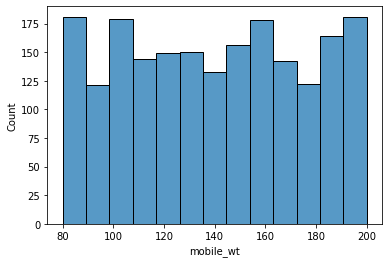

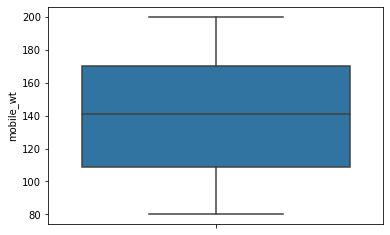

{'missing': 0,
 'min': 80,
 'max': 200,
 'mean': 140.25,
 'var': 1253.14,
 'std': 35.4,
 'range': 120,
 'q1': 109.0,
 'q2': 141.0,
 'q3': 170.0,
 'skewness': 0.01,
 'kurtosis': -1.21}

In [15]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='mobile_wt')

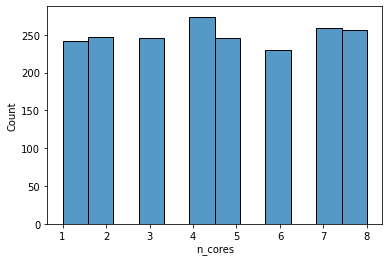

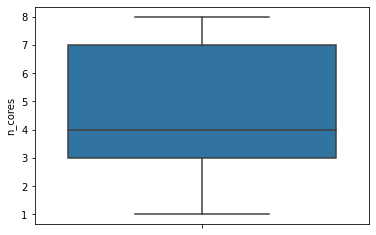

{'missing': 0,
 'min': 1,
 'max': 8,
 'mean': 4.52,
 'var': 5.23,
 'std': 2.29,
 'range': 7,
 'q1': 3.0,
 'q2': 4.0,
 'q3': 7.0,
 'skewness': 0.0,
 'kurtosis': -1.23}

In [16]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='n_cores')

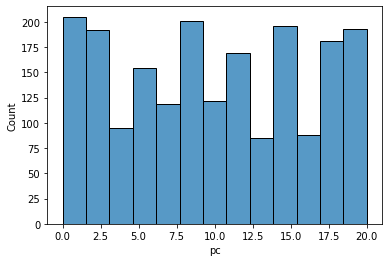

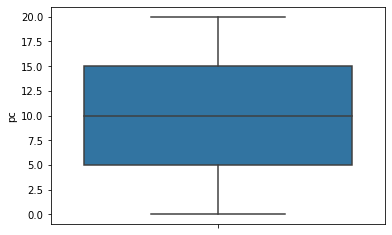

{'missing': 0,
 'min': 0,
 'max': 20,
 'mean': 9.92,
 'var': 36.78,
 'std': 6.06,
 'range': 20,
 'q1': 5.0,
 'q2': 10.0,
 'q3': 15.0,
 'skewness': 0.02,
 'kurtosis': -1.17}

In [17]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='pc')

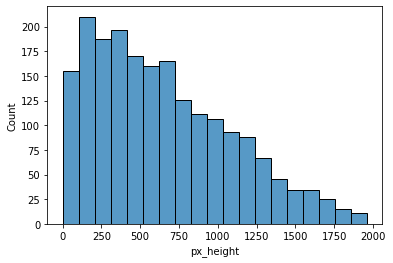

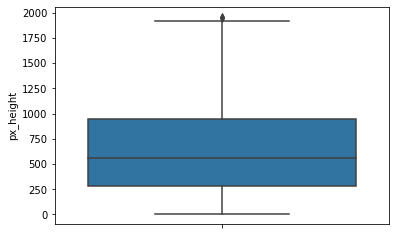

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'kurtosis': -0.32}

In [18]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='px_height')

In [19]:
def out(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(0.1))
    return x

In [20]:
df=df.apply(lambda x:out(x))

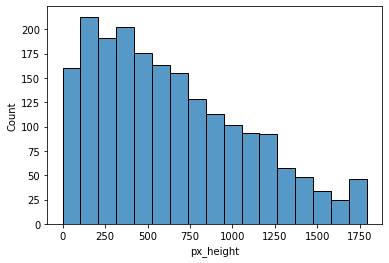

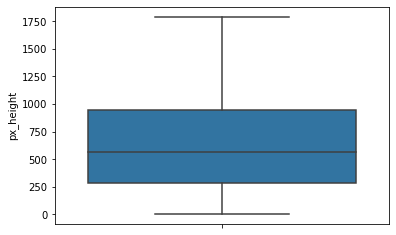

{'missing': 0,
 'min': 0.0,
 'max': 1791.01,
 'mean': 644.37,
 'var': 195174.19,
 'std': 441.79,
 'range': 1791.01,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.64,
 'kurtosis': -0.4}

In [21]:
univariate_num(data=df,x='px_height')

In [22]:
df[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834.0,0,2.1,0,7.0,1,40,0.1,99.0,4,...,0.0,1987.0,3692.0,13,0.0,16,1,1,0,3
1933,897.0,1,2.0,0,3.0,1,2,0.6,154.0,8,...,0.0,994.0,1958.0,7,5.0,7,1,1,0,1


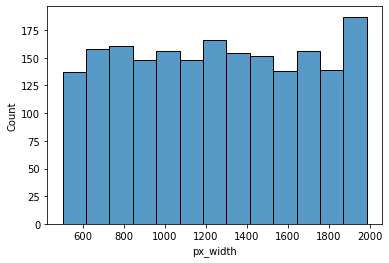

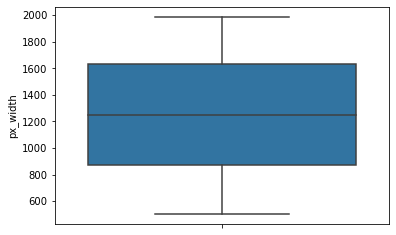

{'missing': 0,
 'min': 500.0,
 'max': 1987.0,
 'mean': 1251.47,
 'var': 186729.07,
 'std': 432.12,
 'range': 1487.0,
 'q1': 874.75,
 'q2': 1247.0,
 'q3': 1633.0,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [23]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='px_width')

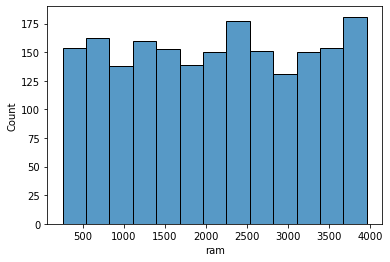

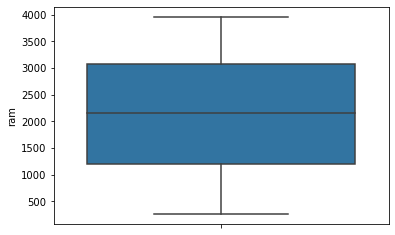

{'missing': 0,
 'min': 256.0,
 'max': 3958.01,
 'mean': 2124.04,
 'var': 1175998.92,
 'std': 1084.43,
 'range': 3702.01,
 'q1': 1207.5,
 'q2': 2146.5,
 'q3': 3064.5,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [24]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='ram')

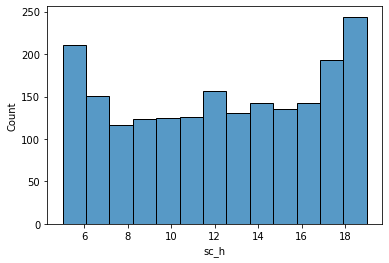

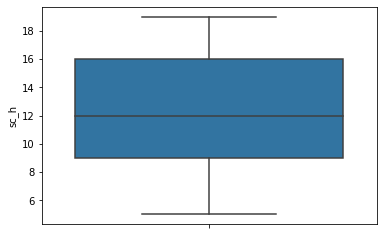

{'missing': 0,
 'min': 5,
 'max': 19,
 'mean': 12.31,
 'var': 17.75,
 'std': 4.21,
 'range': 14,
 'q1': 9.0,
 'q2': 12.0,
 'q3': 16.0,
 'skewness': -0.1,
 'kurtosis': -1.19}

In [25]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='sc_h')

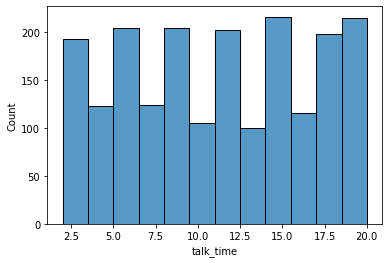

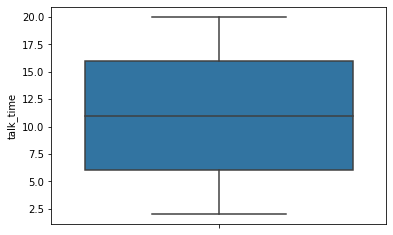

{'missing': 0,
 'min': 2,
 'max': 20,
 'mean': 11.01,
 'var': 29.85,
 'std': 5.46,
 'range': 18,
 'q1': 6.0,
 'q2': 11.0,
 'q3': 16.0,
 'skewness': 0.01,
 'kurtosis': -1.22}

In [26]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_num(data=df,x='talk_time')

#### univariate cat

In [27]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
    plt.figure(figsize=(5,4))
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     four_g Percentage
1    1043     52.15%
0     957     47.85%


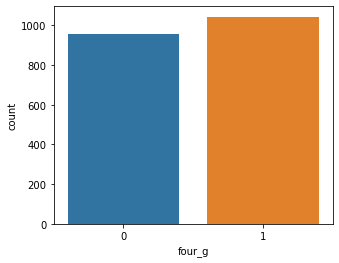

In [28]:
univariate_cat(data=df,x='four_g')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     blue Percentage
0  1010      50.5%
1   990      49.5%


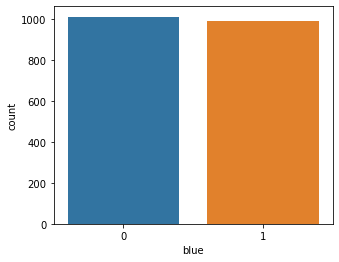

In [29]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_cat(data=df,x='blue')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     three_g Percentage
1     1523     76.15%
0      477     23.85%


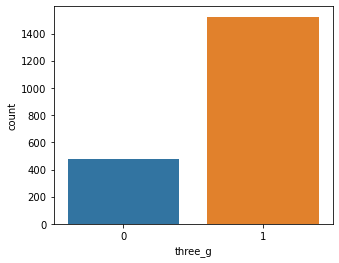

In [30]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_cat(data=df,x='three_g')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     touch_screen Percentage
1          1006      50.3%
0           994      49.7%


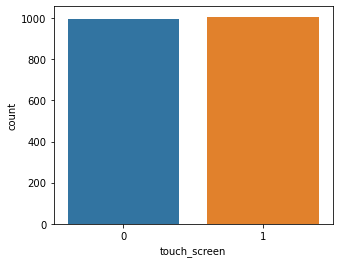

In [31]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_cat(data=df,x='touch_screen')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1, 0]
value counts and %n     wifi Percentage
1  1014      50.7%
0   986      49.3%


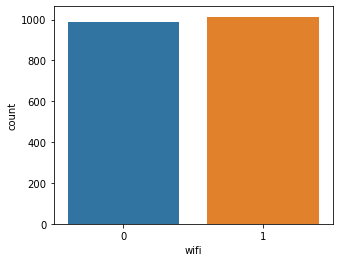

In [32]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_cat(data=df,x='wifi')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 3, 0]
value counts and %n     price_range Percentage
1          500      25.0%
2          500      25.0%
3          500      25.0%
0          500      25.0%


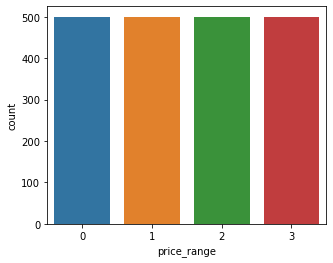

In [33]:
# 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#        'touch_screen', 'wifi', 'price_range'

univariate_cat(data=df,x='price_range')

In [34]:
df.shape # initial shape of data

(2000, 21)

In [35]:
df[df['sc_w']==0].shape  # those rows  with zero screen widht are 180 therefore they have to be removed from our orig dataframe

(180, 21)

In [36]:
df=df[df['sc_w']>0] # droping those entry with zero screen width 

In [37]:
df.shape

(1820, 21)

In [38]:
df[df['px_height']==0].shape # those rows wih zero pixel height had to be removed 

(1, 21)

In [39]:
df=df[df['px_height']>0] # removing all those entry with zero pixel height

In [40]:
df.shape

(1819, 21)

## bivariate analysis

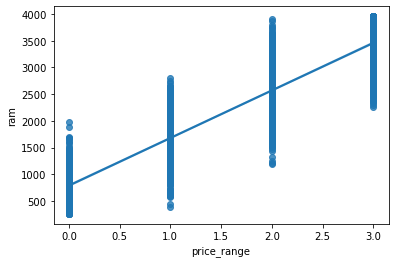

In [41]:
sns.regplot(y=df['ram'],x=df['price_range'],data=df)
plt.show()

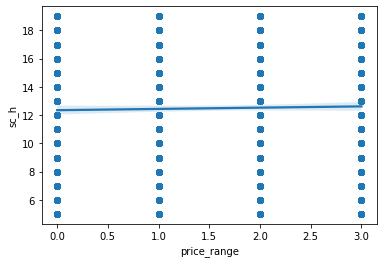

In [42]:
sns.regplot(y=df['sc_h'],x=df['price_range'],data=df)
plt.show()

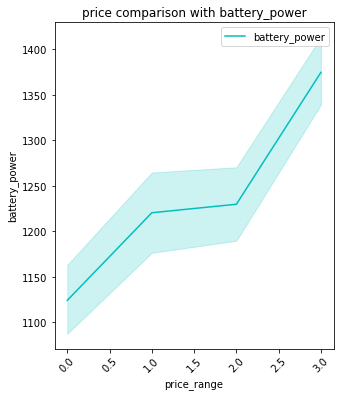

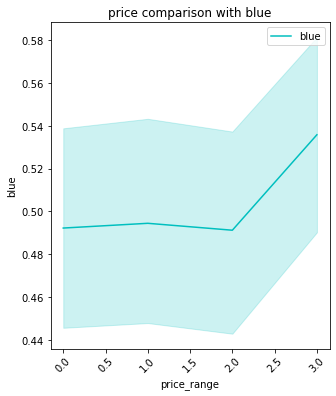

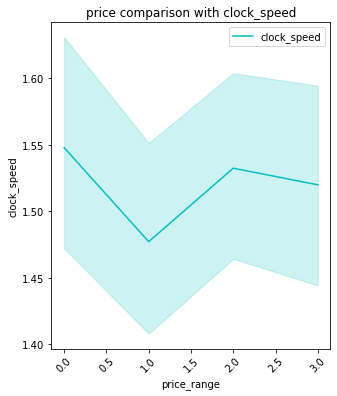

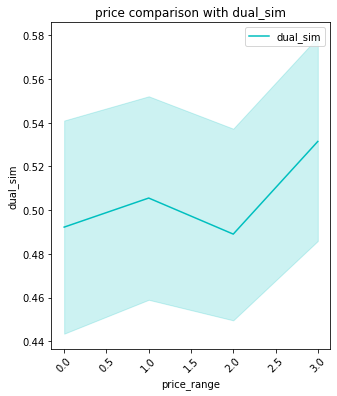

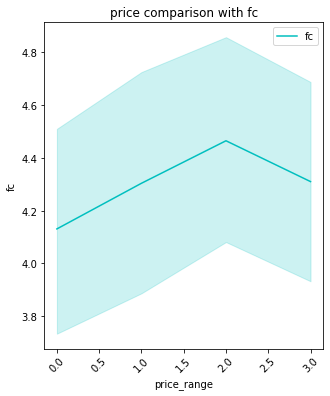

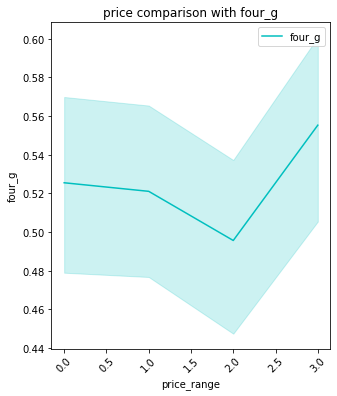

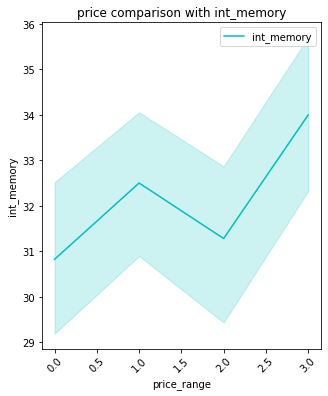

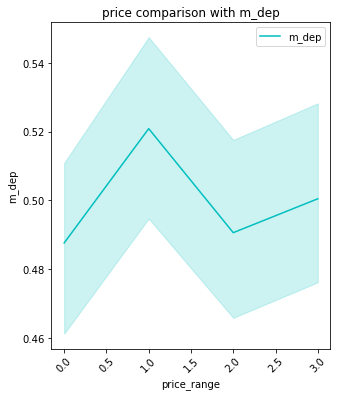

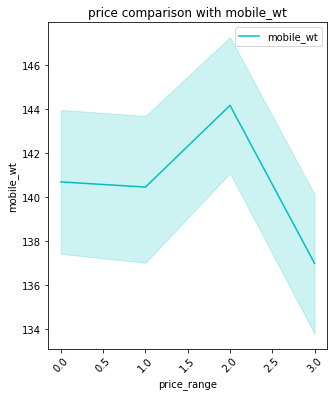

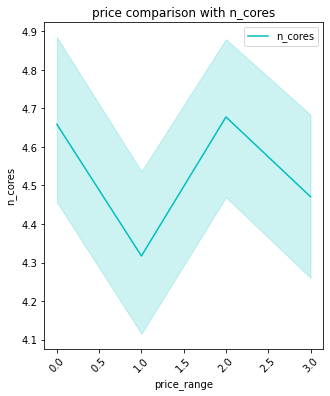

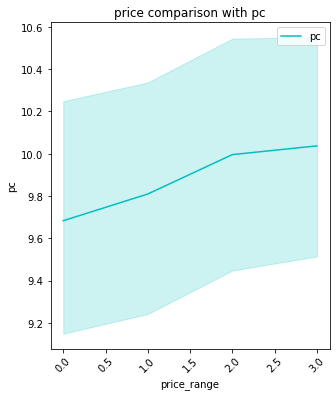

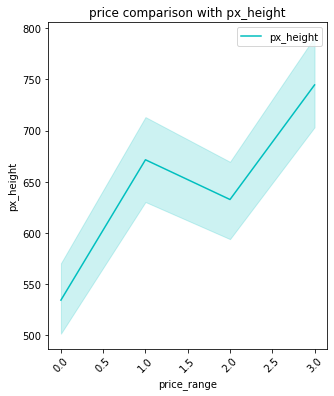

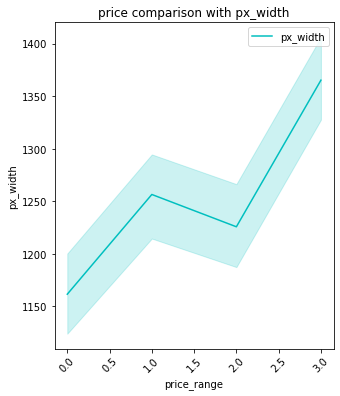

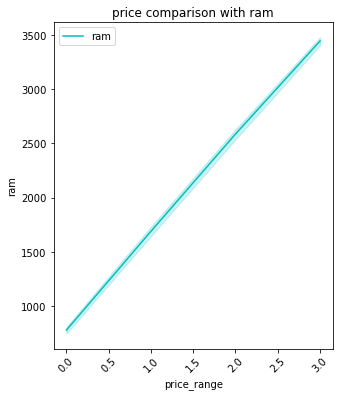

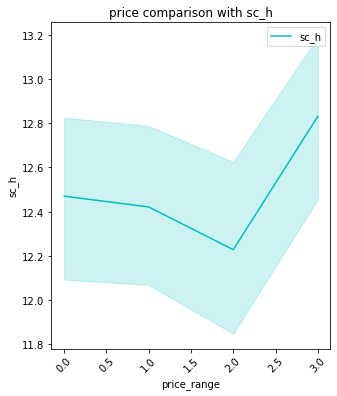

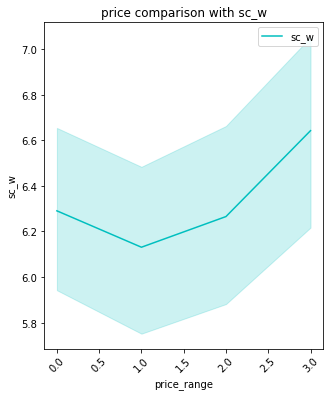

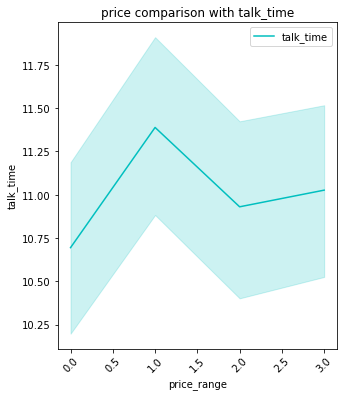

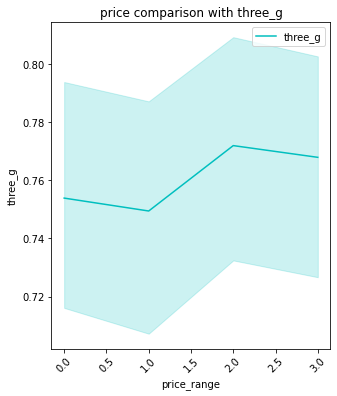

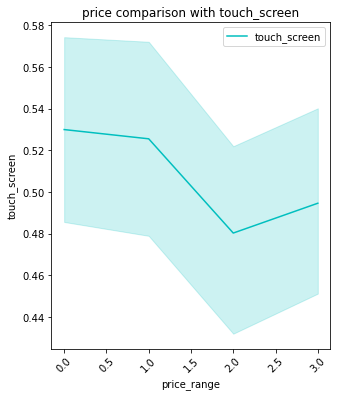

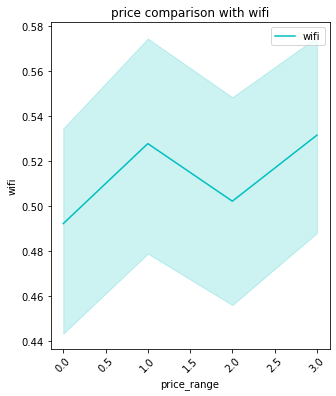

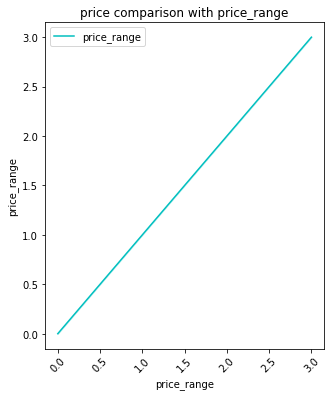

In [43]:
for i in df.columns:
    plt.figure(figsize=(5,6))
    sns.lineplot(data=df, x= 'price_range', y=i, label=i, color='c')
    plt.title(f'price comparison with {i}')
    plt.xlabel('price_range')
    plt.ylabel(i)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

### Multicollinearity

<AxesSubplot:>

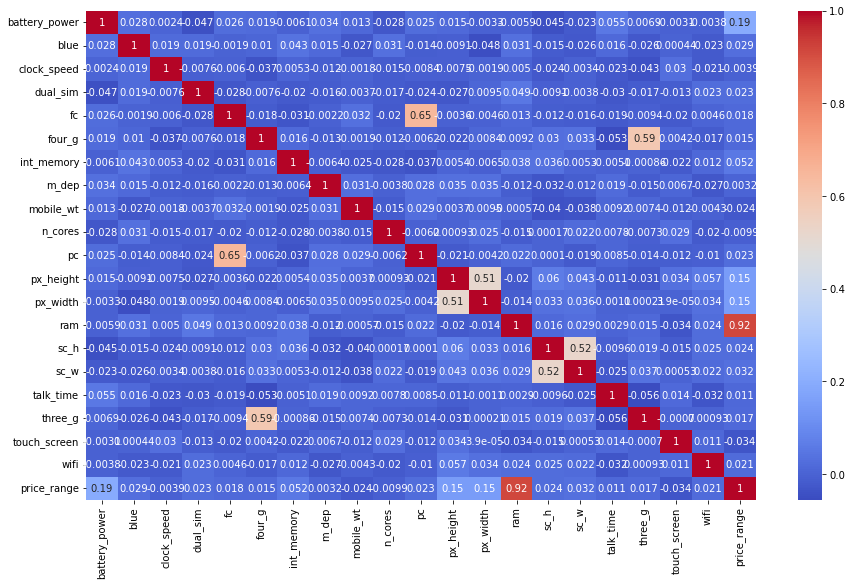

In [44]:
cr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [45]:
# mob.dtypes

### Model Development

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [47]:
# help(naive_bayes)

In [48]:
y=df['price_range']
X=df.drop(['price_range'],axis=1)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99)
mn=MinMaxScaler()
mn_fit=mn.fit(X_train)
X_train_mn=mn_fit.transform(X_train)
X_test_mn=mn_fit.transform(X_test)
X_train_mn=pd.DataFrame(X_train_mn,columns=X_train.columns)
X_test_mn=pd.DataFrame(X_test_mn,columns=X_test.columns)

In [50]:
nbm=MultinomialNB()

In [51]:
?nbm

In [52]:
mn=MultinomialNB()
mn.fit(X_train_mn,y_train)
print('Train Accuracy',mn.score(X_train_mn,y_train))
print('Test Accuracy',mn.score(X_test_mn,y_test))

Train Accuracy 0.6199312714776632
Test Accuracy 0.5631868131868132


In [53]:
pd.DataFrame(mn.predict(X_train_mn))

,0
0,0
1,1
2,3
3,3
4,0
...,...
1450,2
1451,3
1452,2
1453,1
